<h1> Introduction

According to Wikipedia, London has one of the largest concentrations of universities and higher education institutions in the world. It has 40 higher education institutions and has a student population of more than 400,000. Among the institutions in London are some of the old and world-famous colleges that today make up the federal University of London, modern universities, as well as a number of smaller and often highly specialised universities and colleges.
According to an analysis of new data from the UK's Higher Education Statistics Agency (HESA) released on Wednesday, Indian student numbers in London grew by 34.7 per cent in 2018-19, marking the largest numbers since 2011-12. More than 7000 Indian students move to London for Higher Education every year. In a large city and quite expensive city like London, it may become difficult for students looking for a place to stay to find the right neigbourhood. 
This report is targeted towards Indian students who move to London for Higher Education.


<h3>Install required Libraries

In [1]:
pip install geocoder

pip install bs4

Note: you may need to restart the kernel to use updated packages.


You are using pip version 19.0.2, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

#!conda install -c conda-forge geocoder --yes
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


<h3> Saving the Foursquare API credentials

In [110]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret

VERSION = '20180605'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


<h3> Reading the datasets

In [5]:
df = pd.read_csv(r'C:\Users\HP\Downloads\1809_3132_bundle_archive\london_crime_by_lsoa.csv')  # London Crime Dataset

In [6]:
#Housing Prices Dataset
londonhome_df = pd.read_excel(r'C:\Users\HP\Downloads\datasets_67316_133518_UK House price index.xls', sheet_name = "Average price")

In [7]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [8]:
df.shape

(13490604, 7)

In [9]:
df.drop(df.index[df['year'] <= 2014], inplace = True) # Keeping Crime Records only after 2014

In [10]:
df.shape

(2997912, 7)

In [11]:
# Removing all the entires where crime values are null
df = df[df.value != 0]

# Reset the index and dropping the previous index
df = df.reset_index(drop=True)

In [12]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01033083,Hounslow,Violence Against the Person,Wounding/GBH,2,2015,8
3,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
4,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8


In [13]:
df['borough'].value_counts()

Lambeth                   34738
Southwark                 32637
Croydon                   32080
Newham                    30692
Ealing                    30078
Tower Hamlets             30040
Brent                     29437
Barnet                    29256
Lewisham                  28399
Hackney                   28319
Haringey                  27634
Enfield                   26960
Wandsworth                26615
Islington                 26262
Westminster               26191
Camden                    25326
Greenwich                 24820
Hillingdon                24554
Waltham Forest            24310
Hounslow                  24245
Bromley                   24142
Redbridge                 22872
Hammersmith and Fulham    20385
Barking and Dagenham      19282
Kensington and Chelsea    18958
Havering                  18891
Harrow                    16238
Merton                    16067
Bexley                    16054
Richmond upon Thames      14068
Sutton                    13573
Kingston

In [14]:
London_crime = pd.pivot_table(df,values=['value'],
                               index=['borough'],
                               columns=['major_category'],
                               aggfunc=np.sum,fill_value=0)
London_crime.head()

value                                                  \
major_category       Burglary Criminal Damage Drugs Other Notifiable Offences   
borough                                                                         
Barking and Dagenham     2916            3771  1863                       711   
Barnet                   7255            4435  1715                       888   
Bexley                   2208            3238  1324                       681   
Brent                    5332            4408  3904                       947   
Bromley                  4738            4497  1598                       821   

                                                                             
major_category       Robbery Theft and Handling Violence Against the Person  
borough                                                                      
Barking and Dagenham    1087              10784                       11955  
Barnet                  1088              18935                       14404  
Bexley                   380               8557                        8442  
Brent                   1802              17493                       17690  
Bromley                  732              15157                       13258

In [15]:
London_crime.reset_index(inplace = True)

London_crime['Total'] = London_crime.sum(axis=1)
London_crime.head(33)

borough    value                        \
major_category                         Burglary Criminal Damage Drugs   
0                 Barking and Dagenham     2916            3771  1863   
1                               Barnet     7255            4435  1715   
2                               Bexley     2208            3238  1324   
3                                Brent     5332            4408  3904   
4                              Bromley     4738            4497  1598   
5                               Camden     5482            3831  3175   
6                       City of London        7               5    16   
7                              Croydon     5456            6332  2935   
8                               Ealing     5122            5036  2765   
9                              Enfield     5350            4262  2294   
10                           Greenwich     3644            4757  1812   
11                             Hackney     5233            4014  2670   
12              Hammersmith and Fulham     3102            2879  2737   
13                            Haringey     5042            4374  2875   
14                              Harrow     3665            2392  1096   
15                            Havering     3766            3464  1423   
16                          Hillingdon     4445            4783  2145   
17                            Hounslow     3588            4377  2183   
18                           Islington     4400            3884  3163   
19              Kensington and Chelsea     3039            2104  2706   
20                Kingston upon Thames     1806            2082  1644   
21                             Lambeth     5656            5456  5390   
22                            Lewisham     4217            4817  3212   
23                              Merton     2847            2843   942   
24                              Newham     4389            4893  3366   
25                           Redbridge     4242            3277  2289   
26                Richmond upon Thames     2810            2222   716   
27                           Southwark     5937            5193  4110   
28                              Sutton     2512            2637   961   
29                       Tower Hamlets     5354            4783  3441   
30                      Waltham Forest     4103            3976  2490   
31                          Wandsworth     4741            3764  1588   
32                         Westminster     6370            4261  4151   

                                                                     \
major_category Other Notifiable Offences Robbery Theft and Handling   
0                                    711    1087              10784   
1                                    888    1088              18935   
2                                    681     380               8557   
3                                    947    1802              17493   
4                                    821     732              15157   
5                                    928    1929              28543   
6                                      6       9                233   
7                                   1297    1868              18731   
8                                   1160    1305              19643   
9                                    919    1746              15864   
10                                  1034     950              15116   
11                                   968    2073              22975   
12                                   895     754              17881   
13                                   996    2483              19922   
14                                   474     688               8948   
15                                   748     634              11769   
16                                  2313     742              17867   
17                                  1198     771              16920   
18                                   988    1915       

In [16]:
London_crime.columns = London_crime.columns.map(''.join)
London_crime.head()

,borough,valueBurglary,valueCriminal Damage,valueDrugs,valueOther Notifiable Offences,valueRobbery,valueTheft and Handling,valueViolence Against the Person,Total
0,Barking and Dagenham,2916,3771,1863,711,1087,10784,11955,33087
1,Barnet,7255,4435,1715,888,1088,18935,14404,48720
2,Bexley,2208,3238,1324,681,380,8557,8442,24830
3,Brent,5332,4408,3904,947,1802,17493,17690,51576
4,Bromley,4738,4497,1598,821,732,15157,13258,40801


In [17]:
London_crime.columns = ['Borough','Burglary', 'Criminal Damage','Drugs','Other Notifiable Offences',
                        'Robbery','Theft and Handling','Violence Against the Person','Total']
London_crime.head(7)

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,2916,3771,1863,711,1087,10784,11955,33087
1,Barnet,7255,4435,1715,888,1088,18935,14404,48720
2,Bexley,2208,3238,1324,681,380,8557,8442,24830
3,Brent,5332,4408,3904,947,1802,17493,17690,51576
4,Bromley,4738,4497,1598,821,732,15157,13258,40801
5,Camden,5482,3831,3175,928,1929,28543,14772,58660
6,City of London,7,5,16,6,9,233,53,329


In [18]:
London_crime.shape

(33, 9)

In [19]:
London_crime.drop(index = 6, inplace = True)

In [20]:
# getting data from internet
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable sortable'}).tbody

In [21]:
rows = table.find_all('tr')
columns = [v.text.replace('\n','') for v in rows[0].find_all('th')]

In [22]:
London_table = pd.DataFrame(columns = columns)

In [23]:
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map


In [24]:
for i in range(1,len(rows)):
    tds = rows[i].find_all('td')
    
    if len(tds) == 2:
       values = [tds[0].text.replace('\n',''), tds[1].text.replace('\n',''), tds[2].text.replace('\n','')] 
    else:
        values = [td.text.replace('\n','') for td in tds]
    London_table = London_table.append(pd.Series(values, index=columns), ignore_index=True)

In [25]:
London_table

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
1,Barnet,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
2,Bexley,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
3,Brent,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12
4,Bromley,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20
5,Camden,Y,,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,"229,719",51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...,11
6,Croydon,,,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,"372,752",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...,19
7,Ealing,,,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,"342,494",51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...,13
8,Enfield,,,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,"320,524",51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...,30
9,Greenwich [note 2],Y [note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,"264,008",51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...,22


In [26]:
#Removing unnecessary data from the DataFrame
London_table = London_table.replace('note 1','', regex=True) 
London_table = London_table.replace('note 2','', regex=True) 
London_table = London_table.replace('note 3','', regex=True) 
London_table = London_table.replace('note 4','', regex=True) 
London_table = London_table.replace('note 5','', regex=True) 

# View the top of the data set
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [],,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
1,Barnet,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
2,Bexley,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
3,Brent,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12
4,Bromley,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20


In [27]:
#Changing names to match those in the London Crime Dataset 
London_table.iloc[0,0] = 'Barking and Dagenham'
London_table.iloc[9,0] = 'Greenwich'
London_table.iloc[11,0] = 'Hammersmith and Fulham'

In [28]:
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
1,Barnet,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
2,Bexley,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
3,Brent,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12
4,Bromley,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20


In [29]:
#Merging the Crime and Borough DataFrames
Ld_crime = pd.merge(London_crime, London_table, on='Borough')
Ld_crime.head(10)

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,2916,3771,1863,711,1087,10784,11955,33087,,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
1,Barnet,7255,4435,1715,888,1088,18935,14404,48720,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
2,Bexley,2208,3238,1324,681,380,8557,8442,24830,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
3,Brent,5332,4408,3904,947,1802,17493,17690,51576,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12
4,Bromley,4738,4497,1598,821,732,15157,13258,40801,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20
5,Camden,5482,3831,3175,928,1929,28543,14772,58660,Y,,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,"229,719",51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...,11
6,Croydon,5456,6332,2935,1297,1868,18731,20182,56801,,,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,"372,752",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...,19
7,Ealing,5122,5036,2765,1160,1305,19643,18343,53374,,,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,"342,494",51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...,13
8,Enfield,5350,4262,2294,919,1746,15864,14126,44561,,,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,"320,524",51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...,30
9,Greenwich,3644,4757,1812,1034,950,15116,16346,43659,Y [],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,"264,008",51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...,22


In [30]:
Ld_crime.columns = ['Borough','Burglary', 'Criminal Damage','Drugs','Other Notifiable Offences',
                        'Robbery','Theft and Handling','Violence Against the Person','Total','Inner', 'Status', 'Local Authority',
                     'Political Control', 'Headquarters', 'Area', 'Population', 'Coordinates', 'Nr in Map']
Ld_crime.head()

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local Authority,Political Control,Headquarters,Area,Population,Coordinates,Nr in Map
0,Barking and Dagenham,2916,3771,1863,711,1087,10784,11955,33087,,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
1,Barnet,7255,4435,1715,888,1088,18935,14404,48720,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
2,Bexley,2208,3238,1324,681,380,8557,8442,24830,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
3,Brent,5332,4408,3904,947,1802,17493,17690,51576,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12
4,Bromley,4738,4497,1598,821,732,15157,13258,40801,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20


In [31]:
Ld_crime.drop(['Nr in Map'], axis = 1, inplace = True)

In [32]:
#Splitting the Coordinates column into Latitude and Longitude for easier visualization using Folium
new = Ld_crime["Coordinates"].str.split(" ", expand = True) 

Ld_crime["Latitude"]= new[3] 
Ld_crime["Longitude"]= new[4] 

# Dropping old Name columns 
Ld_crime.drop(columns =["Coordinates"], inplace = True)

Ld_crime.head() 

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local Authority,Political Control,Headquarters,Area,Population,Latitude,Longitude
0,Barking and Dagenham,2916,3771,1863,711,1087,10784,11955,33087,,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",﻿51.5607°N,0.1557°E﻿
1,Barnet,7255,4435,1715,888,1088,18935,14404,48720,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",﻿51.6252°N,0.1517°W﻿
2,Bexley,2208,3238,1324,681,380,8557,8442,24830,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",﻿51.4549°N,0.1505°E﻿
3,Brent,5332,4408,3904,947,1802,17493,17690,51576,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",﻿51.5588°N,0.2817°W﻿
4,Bromley,4738,4497,1598,821,732,15157,13258,40801,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",﻿51.4039°N,0.0198°E﻿


In [33]:
for i in range(len(Ld_crime)):
    if (Ld_crime['Latitude'][i][-1] == 'N'):
        Ld_crime['Latitude'][i] = Ld_crime['Latitude'][i][1:-2]
        Ld_crime['Latitude'][i] = "+{0}".format(Ld_crime['Latitude'][i])

    if (Ld_crime['Longitude'][i][-2] == 'E'):
        Ld_crime['Longitude'][i] = Ld_crime['Longitude'][i][:-3]
        Ld_crime['Longitude'][i] = "+{0}".format(Ld_crime['Longitude'][i])
    
    if (Ld_crime['Latitude'][i][-1] == 'S'):
        Ld_crime['Latitude'][i] = Ld_crime['Latitude'][i][1:-2]
        Ld_crime['Latitude'][i] = "-{0}".format(Ld_crime['Latitude'][i])
    
    if (Ld_crime['Longitude'][i][-2] == 'W'):
        Ld_crime['Longitude'][i] = Ld_crime['Longitude'][i][:-3]
        Ld_crime['Longitude'][i] = "-{0}".format(Ld_crime['Longitude'][i])


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [34]:
Ld_crime

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local Authority,Political Control,Headquarters,Area,Population,Latitude,Longitude
0,Barking and Dagenham,2916,3771,1863,711,1087,10784,11955,33087,,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",+51.5607,+0.1557
1,Barnet,7255,4435,1715,888,1088,18935,14404,48720,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",+51.6252,-0.1517
2,Bexley,2208,3238,1324,681,380,8557,8442,24830,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",+51.4549,+0.1505
3,Brent,5332,4408,3904,947,1802,17493,17690,51576,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",+51.5588,-0.2817
4,Bromley,4738,4497,1598,821,732,15157,13258,40801,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",+51.4039,+0.0198
5,Camden,5482,3831,3175,928,1929,28543,14772,58660,Y,,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,"229,719",+51.5290,-0.1255
6,Croydon,5456,6332,2935,1297,1868,18731,20182,56801,,,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,"372,752",+51.3714,-0.0977
7,Ealing,5122,5036,2765,1160,1305,19643,18343,53374,,,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,"342,494",+51.5130,-0.3089
8,Enfield,5350,4262,2294,919,1746,15864,14126,44561,,,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,"320,524",+51.6538,-0.0799
9,Greenwich,3644,4757,1812,1034,950,15116,16346,43659,Y [],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,"264,008",+51.4892,+0.0648


In [35]:
Ld_crime['Latitude'] = Ld_crime['Latitude'].astype(float)
Ld_crime['Longitude'] = Ld_crime['Longitude'].astype(float)

In [36]:
for i in range(len(Ld_crime)):
    Ld_crime['Population'][i] = Ld_crime['Population'][i].replace(",", "")

Ld_crime['Population'] = Ld_crime['Population'].astype(float)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
#Importing Folium for visualizing the data on Maps
import folium
latitude = 51.5074
longitude = -0.1278
london_crime_map = folium.Map(location=[latitude, longitude], zoom_start=11)

In [38]:
london_crime_map

In [39]:
from folium.features import DivIcon
from folium import IFrame

In [40]:
# create map of London using latitude and longitude values and visualizing Population of Boroughs
london_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, population in zip(Ld_crime['Latitude'], 
                                              Ld_crime['Longitude'], 
                                              Ld_crime['Borough'],
                                             Ld_crime['Population']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=np.sqrt(population/300),
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(london_map)  

london_map 

In [41]:
Ld_crime["Burglary_per_capita"] = Ld_crime['Burglary']/Ld_crime['Population']
Ld_crime["Criminal Damage_per_capita"] = Ld_crime['Criminal Damage']/Ld_crime['Population']
Ld_crime['Drugs_per_capita'] = Ld_crime['Drugs']/Ld_crime['Population']
Ld_crime['Other Notifiable Offences_per_capita'] = Ld_crime['Other Notifiable Offences']/Ld_crime['Population']
Ld_crime['Robbery_per_capita'] = Ld_crime['Robbery']/Ld_crime['Population']
Ld_crime['Theft and Handling_per_capita'] = Ld_crime['Theft and Handling']/Ld_crime['Population']
Ld_crime['Violence Against the Person_per_capita'] = Ld_crime['Violence Against the Person']/Ld_crime['Population']
Ld_crime['Total_per_capita'] = Ld_crime['Total']/Ld_crime['Population']

In [42]:
# create map of London using latitude and longitude values
london_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map according to Roberies per Borough
for lat, lng, neighborhood, robbery in zip(Ld_crime['Latitude'], 
                                              Ld_crime['Longitude'], 
                                              Ld_crime['Borough'],
                                             Ld_crime['Robbery_per_capita']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=np.sqrt(robbery*30000),
        popup=label,
        color='black',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7,
        parse_html=False).add_to(london_map)  
folium.map.Marker(
    [(51.5074-0.09), (-0.1278+.15)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 12pt">Circle Area = Robbery per capita </div>',
        )
    ).add_to(london_map)


london_map

In [43]:
Ld_crime.head()

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,...,Latitude,Longitude,Burglary_per_capita,Criminal Damage_per_capita,Drugs_per_capita,Other Notifiable Offences_per_capita,Robbery_per_capita,Theft and Handling_per_capita,Violence Against the Person_per_capita,Total_per_capita
0,Barking and Dagenham,2916,3771,1863,711,1087,10784,11955,33087,,...,51.5607,0.1557,0.015004,0.019403,0.009586,0.003658,0.005593,0.055487,0.061512,0.170243
1,Barnet,7255,4435,1715,888,1088,18935,14404,48720,,...,51.6252,-0.1517,0.019657,0.012016,0.004647,0.002406,0.002948,0.051302,0.039026,0.132001
2,Bexley,2208,3238,1324,681,380,8557,8442,24830,,...,51.4549,0.1505,0.009329,0.013681,0.005594,0.002877,0.001605,0.036153,0.035667,0.104906
3,Brent,5332,4408,3904,947,1802,17493,17690,51576,,...,51.5588,-0.2817,0.016806,0.013894,0.012305,0.002985,0.005680,0.055137,0.055758,0.162565
4,Bromley,4738,4497,1598,821,732,15157,13258,40801,,...,51.4039,0.0198,0.014904,0.014146,0.005027,0.002583,0.002303,0.047679,0.041705,0.128346


In [44]:
Ld_crime.drop(['Burglary', 'Criminal Damage',
       'Drugs', 'Other Notifiable Offences', 'Robbery', 'Theft and Handling', 'Violence Against the Person', 'Total'], axis=1, inplace=True)

In [45]:
Ld_crime.head()

,Borough,Inner,Status,Local Authority,Political Control,Headquarters,Area,Population,Latitude,Longitude,Burglary_per_capita,Criminal Damage_per_capita,Drugs_per_capita,Other Notifiable Offences_per_capita,Robbery_per_capita,Theft and Handling_per_capita,Violence Against the Person_per_capita,Total_per_capita
0,Barking and Dagenham,,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352.0,51.5607,0.1557,0.015004,0.019403,0.009586,0.003658,0.005593,0.055487,0.061512,0.170243
1,Barnet,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088.0,51.6252,-0.1517,0.019657,0.012016,0.004647,0.002406,0.002948,0.051302,0.039026,0.132001
2,Bexley,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687.0,51.4549,0.1505,0.009329,0.013681,0.005594,0.002877,0.001605,0.036153,0.035667,0.104906
3,Brent,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264.0,51.5588,-0.2817,0.016806,0.013894,0.012305,0.002985,0.005680,0.055137,0.055758,0.162565
4,Bromley,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899.0,51.4039,0.0198,0.014904,0.014146,0.005027,0.002583,0.002303,0.047679,0.041705,0.128346


In [46]:
#Dropping unnecessary columns 
Ld_crime.drop(['Local Authority', 'Political Control', 'Headquarters'], axis = 1, inplace = True)
Ld_crime.drop(['Inner', 'Status'], axis = 1, inplace = True)

In [47]:
#Using FourSquare API to get nearby Points of Interest for each Borough
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [49]:
london_venues = getNearbyVenues(names=Ld_crime['Borough'],
                                   latitudes=Ld_crime['Latitude'],
                                   longitudes=Ld_crime['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [50]:
print(london_venues.shape)

(960, 7)


In [51]:
london_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Hoo Hing,51.567561,0.135999,Grocery Store
2,Barking and Dagenham,51.5607,0.1557,Asda,51.565751,0.143392,Supermarket
3,Barking and Dagenham,51.5607,0.1557,Iceland,51.560578,0.147685,Grocery Store
4,Barking and Dagenham,51.5607,0.1557,Shell,51.560415,0.148364,Gas Station


In [52]:
london_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Barking and Dagenham,30,30,30,30,30,30
Barnet,30,30,30,30,30,30
Bexley,30,30,30,30,30,30
Brent,30,30,30,30,30,30
Bromley,30,30,30,30,30,30
Camden,30,30,30,30,30,30
Croydon,30,30,30,30,30,30
Ealing,30,30,30,30,30,30
Enfield,30,30,30,30,30,30


In [53]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 181 uniques categories.


In [54]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighbourhood'] = london_venues['Neighbourhood'] 

#move neighborhood column to the first column
fixed_columns = ["Neighbourhood"] + list(london_onehot.columns.difference(['Neighbourhood']))
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Neighbourhood,African Restaurant,Airport,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#Creating london_grouped DataFrame with count of each POI in each Borough
london_grouped = london_onehot.groupby('Neighbourhood').sum().reset_index()
london_grouped.shape

(32, 182)

In [56]:
london_grouped.head()

,Neighbourhood,African Restaurant,Airport,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barnet,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,Bexley,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,Brent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Bromley,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [57]:
london_grouped.rename(columns = {london_grouped.columns[0] : 'Borough'}, inplace = True)

In [58]:
london_grouped.head()

,Borough,African Restaurant,Airport,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barnet,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,Bexley,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,Brent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Bromley,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [59]:
#Merging the Crimes and Points of Interest DataFrames
crime_venues = Ld_crime.merge(london_grouped, on ="Borough", how="left")

In [60]:
crime_venues.head()

,Borough,Area,Population,Latitude,Longitude,Burglary_per_capita,Criminal Damage_per_capita,Drugs_per_capita,Other Notifiable Offences_per_capita,Robbery_per_capita,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,13.93,194352.0,51.5607,0.1557,0.015004,0.019403,0.009586,0.003658,0.005593,...,0,0,0,0,0,0,0,0,0,0
1,Barnet,33.49,369088.0,51.6252,-0.1517,0.019657,0.012016,0.004647,0.002406,0.002948,...,0,2,0,0,0,0,0,0,0,0
2,Bexley,23.38,236687.0,51.4549,0.1505,0.009329,0.013681,0.005594,0.002877,0.001605,...,0,0,0,1,0,0,0,0,0,0
3,Brent,16.70,317264.0,51.5588,-0.2817,0.016806,0.013894,0.012305,0.002985,0.005680,...,0,0,0,0,0,1,0,0,0,0
4,Bromley,57.97,317899.0,51.4039,0.0198,0.014904,0.014146,0.005027,0.002583,0.002303,...,0,1,0,0,0,0,0,0,0,0


In [61]:
crime_venues.replace(np.nan, 0.0, inplace=True)

<h3> Analyzing the Data using K-Means Clustering

In [62]:
X_orig = crime_venues.drop(['Borough', 'Area', 'Latitude', 'Longitude'], axis=1)

In [63]:
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X_orig)
X_norm

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.21228784, -0.41301592,  1.82658039, ..., -0.24413654,
        -0.25819889, -0.25819889],
       [ 1.88348276,  0.86893995, -1.31448865, ..., -0.24413654,
        -0.25819889, -0.25819889],
       [-0.46224522, -1.97657404, -0.60673929, ..., -0.24413654,
        -0.25819889, -0.25819889],
       ...,
       [ 0.05349214, -0.29374649, -0.0631867 , ..., -0.24413654,
        -0.25819889, -0.25819889],
       [ 0.84577172, -0.34016016, -1.26956187, ..., -0.24413654,
        -0.25819889, -0.25819889],
       [-0.63668527,  3.19013921,  1.56342683, ...,  2.35998653,
        -0.25819889, -0.25819889]])

In [64]:
X_norm.shape

(32, 190)

In [68]:
weight1 = np.ones((4,))
weight1 = weight1 / 4
weight2 = list(weight1) + [1]
weight3 = np.ones((185,))
weight3 = weight3 / 185
weight3[0:10]

array([0.00540541, 0.00540541, 0.00540541, 0.00540541, 0.00540541,
       0.00540541, 0.00540541, 0.00540541, 0.00540541, 0.00540541])

In [69]:
weights = np.array(list(weight2) + list(weight3))
weights[0:10]

array([0.25      , 0.25      , 0.25      , 0.25      , 1.        ,
       0.00540541, 0.00540541, 0.00540541, 0.00540541, 0.00540541])

In [70]:
X_norm = X_norm*weights

In [71]:
distortions = []
ks = []
for kclusters in range (1,10):
    kmeans = KMeans(n_clusters=kclusters, random_state=21).fit(X_norm)
    ks.append(kclusters)
    distortions.append(kmeans.inertia_)
    ks_distortions = pd.DataFrame({'Number of Clusters': ks, 'Distortion': distortions})
ks_distortions

,Number of Clusters,Distortion
0,1,40.172973
1,2,20.559339
2,3,10.333476
3,4,7.815270
4,5,6.172126
5,6,5.008901
6,7,4.011691
7,8,3.416559
8,9,3.112137


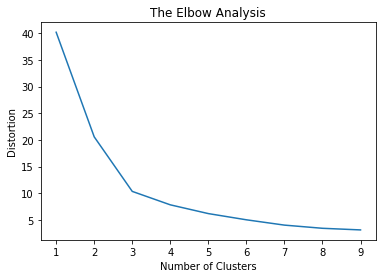

In [72]:
plt.plot(ks_distortions["Number of Clusters"], ks_distortions["Distortion"])
plt.title("The Elbow Analysis")
plt.ylabel("Distortion")
plt.xlabel("Number of Clusters")

plt.show()

In [73]:
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=21).fit(X_norm)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_)
print(kmeans.inertia_)

[0 3 3 3 3 0 3 3 3 0 0 0 0 1 3 4 0 0 0 1 0 3 1 0 3 1 3 1 0 3 3 2]
6.1721256041380474


In [74]:
#Adding the Cluster Labels to the Dataset
cluster_crime_venues = crime_venues.copy()
cluster_crime_venues.insert(0, "Cluster Labels", kmeans.labels_)

<h4>Visualizing the Clusters on Map using criteria like Population, Crime, etc

In [75]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, population in zip(cluster_crime_venues['Latitude'], 
                                  cluster_crime_venues['Longitude'], 
                                  cluster_crime_venues['Borough'], 
                                  cluster_crime_venues['Cluster Labels'],
                                       cluster_crime_venues['Population']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=np.sqrt(population/1000),
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)

folium.map.Marker(
    [(43.694286-0.09), (-79.412848+.15)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 12pt">Circle Area = Population </div>',
        )
    ).add_to(map_clusters)
       
map_clusters

In [76]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, cafes in zip(cluster_crime_venues['Latitude'], 
                                  cluster_crime_venues['Longitude'], 
                                  cluster_crime_venues['Borough'], 
                                  cluster_crime_venues['Cluster Labels'],
                                       cluster_crime_venues['Total_per_capita']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=cafes*100,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)

folium.map.Marker(
    [(51.5074-0.09), (-0.1278+.15)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 12pt"><b>Circle Radius = Number of Cafes </b></div>',
        )
    ).add_to(map_clusters)
       
map_clusters

<h3> Analysis of House Pricing Data

In [77]:
londonhome_df

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.59610,74435.76052,64018.87894,54705.15790,NaN,53202.77128
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.15490
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.86810,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.28430
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.77960,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.85480
5,1995-05-01,84409.1,53042.2,90258,63997.1,73704,81542.6,119929,68844.9,82077.1,...,44223.61973,44830.98563,45878.00396,50369.66188,56479.80183,75432.02786,64530.36358,54698.83831,NaN,53678.24041
6,1995-06-01,94900.5,53700.3,90107.2,64252.3,74310.5,82382.8,121887,69052.5,81630.7,...,44112.96432,45392.63981,45679.99539,50100.43023,56288.94557,75606.24501,65511.00800,54420.15939,NaN,53735.15475
7,1995-07-01,110128,52113.1,91441.2,63722.7,74127,82898.5,124028,69142.5,82352.2,...,44109.58764,45534.99864,46037.67312,49860.00809,57242.30186,75984.24079,65224.88465,54265.86368,NaN,53900.60633
8,1995-08-01,112329,52232.2,92361.3,64432.6,73547,82054.4,125530,68993.4,82706.7,...,44193.66583,45111.45939,45922.53585,49598.45969,56732.40547,75529.34488,64851.60429,54365.71495,NaN,53600.31975
9,1995-09-01,104473,51471.6,93273.1,64509.5,73789.5,81440.4,120597,69393.5,82011.1,...,44088.07696,44837.86023,45771.66321,49319.69715,56259.28635,74940.80872,64352.47119,54243.98694,NaN,53309.23310


In [78]:
#Dropping City of Lindon as it is technically not a Borough but a Pricipal Division of London
londonhome_df.drop(columns =["City of London"], inplace = True)

In [79]:
londonhome_df.head()

,Unnamed: 0,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995-01-01,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.59610,74435.76052,64018.87894,54705.15790,NaN,53202.77128
2,1995-02-01,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.15490
3,1995-03-01,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,...,44434.86810,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.28430
4,1995-04-01,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,...,44267.77960,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.85480


In [80]:
londonhome_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 48 columns):
Unnamed: 0              283 non-null datetime64[ns]
Barking & Dagenham      284 non-null object
Barnet                  284 non-null object
Bexley                  284 non-null object
Brent                   284 non-null object
Bromley                 284 non-null object
Camden                  284 non-null object
Croydon                 284 non-null object
Ealing                  284 non-null object
Enfield                 284 non-null object
Greenwich               284 non-null object
Hackney                 284 non-null object
Hammersmith & Fulham    284 non-null object
Haringey                284 non-null object
Harrow                  284 non-null object
Havering                284 non-null object
Hillingdon              284 non-null object
Hounslow                284 non-null object
Islington               284 non-null object
Kensington & Chelsea    284 non-null object
Kingsto

In [81]:
londonhome_df.drop(londonhome_df.columns[33:], axis=1, inplace=True)

In [82]:
londonhome_df.head()

,Unnamed: 0,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,NaT,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,...,E09000024,E09000025,E09000026,E09000027,E09000028,E09000029,E09000030,E09000031,E09000032,E09000033
1,1995-01-01,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,...,82070.6,53539.3,72189.6,109326,67885.2,71537,59865.2,61319.4,88559,133025
2,1995-02-01,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,...,79982.7,53153.9,72141.6,111103,64799.1,70893.2,62318.5,60252.1,88641,131468
3,1995-03-01,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,...,80661.7,53458.3,72501.4,107325,65763.3,70306.8,63938.7,60871.1,87124.8,132260
4,1995-04-01,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,...,79990.5,54479.8,72228.6,106875,63073.6,69411.9,66233.2,60971.4,87026,133370


In [83]:
londonhome_df.rename(columns = {'Unnamed: 0': 'Date'}, inplace = True)

In [84]:
londonhome_df.head()

,Date,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,NaT,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,...,E09000024,E09000025,E09000026,E09000027,E09000028,E09000029,E09000030,E09000031,E09000032,E09000033
1,1995-01-01,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,...,82070.6,53539.3,72189.6,109326,67885.2,71537,59865.2,61319.4,88559,133025
2,1995-02-01,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,...,79982.7,53153.9,72141.6,111103,64799.1,70893.2,62318.5,60252.1,88641,131468
3,1995-03-01,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,...,80661.7,53458.3,72501.4,107325,65763.3,70306.8,63938.7,60871.1,87124.8,132260
4,1995-04-01,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,...,79990.5,54479.8,72228.6,106875,63073.6,69411.9,66233.2,60971.4,87026,133370


In [85]:
londonhome_df.drop([0], axis=0, inplace=True)

In [86]:
londonhome_df['Year'] = pd.DatetimeIndex(londonhome_df['Date']).year

In [87]:
for i in range(1,len(londonhome_df)):
    if (londonhome_df['Year'][i] != 2016):
        londonhome_df.drop([i], axis=0, inplace=True)

In [88]:
londonhome_df

,Date,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Year
253,2016-01-01,258758,512166,307550,469516,413460,808531,332811,470507,364189,...,325990,371307,643448,495497,343907,458754,391911,596494,1.02445e+06,2016
254,2016-02-01,262861,509863,315289,482555,416897,827590,337821,471280,367809,...,329609,377717,653025,498895,351088,460405,404347,593983,989059,2016
255,2016-03-01,266209,513342,314140,473554,418642,854686,342038,473105,372205,...,336144,388151,662897,513356,354131,469410,411148,602144,971279,2016
256,2016-04-01,266744,517408,311889,485099,422301,838254,348190,477227,378215,...,337626,388739,647205,514789,360226,456740,410743,604127,966369,2016
257,2016-05-01,268081,533676,314431,488299,425210,807401,352808,469890,382086,...,343814,389069,654692,517878,363181,450421,403536,613096,1.00747e+06,2016
258,2016-06-01,269318,539830,320636,493629,432272,770905,358488,477207,384297,...,351368,388322,654186,503827,369743,439720,405638,609995,1.01729e+06,2016
259,2016-07-01,274243,535272,325381,494641,439331,753956,363898,478453,387870,...,355960,394381,677067,505216,373699,443471,413813,614052,1.02545e+06,2016
260,2016-08-01,279484,532358,326878,489421,443018,769512,369722,483847,394132,...,359410,399449,670081,508908,376311,449287,415579,609803,986768,2016
261,2016-09-01,283654,534921,329408,499182,438327,786866,369069,477486,401714,...,362358,403092,666263,518430,375152,463714,416108,612944,967520,2016
262,2016-10-01,286210,533793,330194,504665,430090,805146,368082,477266,400662,...,359280,401347,639088,521833,374923,465362,420220,617956,961901,2016


In [89]:
londonhome_df.drop([283], axis=0, inplace=True)

In [90]:
londonhome_df.drop(['Date', 'Year'], axis=1, inplace=True)

In [91]:
londonhome_df

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
253,258758,512166,307550,469516,413460,808531,332811,470507,364189,365319,...,487335,325990,371307,643448,495497,343907,458754,391911,596494,1.02445e+06
254,262861,509863,315289,482555,416897,827590,337821,471280,367809,365734,...,482794,329609,377717,653025,498895,351088,460405,404347,593983,989059
255,266209,513342,314140,473554,418642,854686,342038,473105,372205,360461,...,495205,336144,388151,662897,513356,354131,469410,411148,602144,971279
256,266744,517408,311889,485099,422301,838254,348190,477227,378215,366843,...,503813,337626,388739,647205,514789,360226,456740,410743,604127,966369
257,268081,533676,314431,488299,425210,807401,352808,469890,382086,376366,...,514101,343814,389069,654692,517878,363181,450421,403536,613096,1.00747e+06
258,269318,539830,320636,493629,432272,770905,358488,477207,384297,380772,...,513336,351368,388322,654186,503827,369743,439720,405638,609995,1.01729e+06
259,274243,535272,325381,494641,439331,753956,363898,478453,387870,379564,...,511128,355960,394381,677067,505216,373699,443471,413813,614052,1.02545e+06
260,279484,532358,326878,489421,443018,769512,369722,483847,394132,379424,...,509855,359410,399449,670081,508908,376311,449287,415579,609803,986768
261,283654,534921,329408,499182,438327,786866,369069,477486,401714,378395,...,505887,362358,403092,666263,518430,375152,463714,416108,612944,967520
262,286210,533793,330194,504665,430090,805146,368082,477266,400662,374524,...,504287,359280,401347,639088,521833,374923,465362,420220,617956,961901


In [92]:
londonhome_df = londonhome_df.T

In [93]:
londonhome_df

,253,254,255,256,257,258,259,260,261,262,263,264
Barking & Dagenham,258758,262861,266209,266744,268081,269318,274243,279484,283654,286210,285853,285622
Barnet,512166,509863,513342,517408,533676,539830,535272,532358,534921,533793,526422,522223
Bexley,307550,315289,314140,311889,314431,320636,325381,326878,329408,330194,331943,331025
Brent,469516,482555,473554,485099,488299,493629,494641,489421,499182,504665,502654,490418
Bromley,413460,416897,418642,422301,425210,432272,439331,443018,438327,430090,427363,429187
Camden,808531,827590,854686,838254,807401,770905,753956,769512,786866,805146,830455,832126
Croydon,332811,337821,342038,348190,352808,358488,363898,369722,369069,368082,363662,363571
Ealing,470507,471280,473105,477227,469890,477207,478453,483847,477486,477266,475630,485390
Enfield,364189,367809,372205,378215,382086,384297,387870,394132,401714,400662,398233,394465
Greenwich,365319,365734,360461,366843,376366,380772,379564,379424,378395,374524,371158,374293


In [94]:
londonhome_df['Average Price 2016'] = londonhome_df.mean(axis = 1) 
londonhome_df.drop(londonhome_df.columns[:-1], axis=1, inplace=True)

In [95]:
 londonhome_df.head()

,Average Price 2016
Barking & Dagenham,273919.636042
Barnet,525939.577300
Bexley,321563.508775
Brent,489469.418367
Bromley,428008.119983


In [96]:
londonhome_df.reset_index(inplace = True)
londonhome_df.rename(columns = {'index': 'Borough'}, inplace = True)

In [97]:
 londonhome_df.head()

,Borough,Average Price 2016
0,Barking & Dagenham,273919.636042
1,Barnet,525939.577300
2,Bexley,321563.508775
3,Brent,489469.418367
4,Bromley,428008.119983


<h3> Merging the housing Dataset to create a Dataset with housing, borough and crime data

In [98]:
London_df = pd.merge(cluster_crime_venues, londonhome_df, on='Borough')

In [99]:
London_df

,Cluster Labels,Borough,Area,Population,Latitude,Longitude,Burglary_per_capita,Criminal Damage_per_capita,Drugs_per_capita,Other Notifiable Offences_per_capita,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Average Price 2016
0,3,Barnet,33.49,369088.0,51.6252,-0.1517,0.019657,0.012016,0.004647,0.002406,...,2,0,0,0,0,0,0,0,0,525939.577300
1,3,Bexley,23.38,236687.0,51.4549,0.1505,0.009329,0.013681,0.005594,0.002877,...,0,0,1,0,0,0,0,0,0,321563.508775
2,3,Brent,16.70,317264.0,51.5588,-0.2817,0.016806,0.013894,0.012305,0.002985,...,0,0,0,0,1,0,0,0,0,489469.418367
3,3,Bromley,57.97,317899.0,51.4039,0.0198,0.014904,0.014146,0.005027,0.002583,...,1,0,0,0,0,0,0,0,0,428008.119983
4,0,Camden,8.40,229719.0,51.5290,-0.1255,0.023864,0.016677,0.013821,0.004040,...,1,0,0,0,0,1,0,0,0,807118.961958
5,3,Croydon,33.41,372752.0,51.3714,-0.0977,0.014637,0.016987,0.007874,0.003480,...,0,0,0,0,0,0,0,0,0,355846.809333
6,3,Ealing,21.44,342494.0,51.5130,-0.3089,0.014955,0.014704,0.008073,0.003387,...,0,0,0,1,0,0,0,0,0,476440.737308
7,3,Enfield,31.74,320524.0,51.6538,-0.0799,0.016691,0.013297,0.007157,0.002867,...,1,0,0,0,0,0,0,0,0,385489.805458
8,0,Greenwich,18.28,264008.0,51.4892,0.0648,0.013803,0.018018,0.006863,0.003917,...,0,0,0,1,0,0,0,0,0,372737.740000
9,0,Hackney,7.36,257379.0,51.5450,-0.0553,0.020332,0.015596,0.010374,0.003761,...,0,1,0,1,0,0,2,0,0,537746.346433


In [100]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, house_price in zip(London_df['Latitude'], 
                                  London_df['Longitude'], 
                                  London_df['Borough'],
                                  London_df['Cluster Labels'],
                                  London_df['Average Price 2016']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + " $" + str(house_price), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=np.sqrt(house_price/1000),
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)

folium.map.Marker(
    [(51.5074-0.09), (-0.1278+.15)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 14pt"><b>Circle Area = Average home price </b></div>',
        )
    ).add_to(map_clusters)
       
map_clusters

In [101]:
table_df =pd.DataFrame(London_df.groupby('Cluster Labels', as_index=False)["Borough"].count())
table_df.rename(columns={"Borough": "Number of Boroughs"})

,Cluster Labels,Number of Boroughs
0,0,9
1,1,5
2,2,1
3,3,13
4,4,1


In [102]:
clusters_price_parks_cafes_ind_book = pd.DataFrame(
    London_df.groupby(
        "Cluster Labels", as_index=False)[
        "Cluster Labels","Average Price 2016", "Park", "Coffee Shop", "Indian Restaurant", "Bookstore"].describe())
clusters_price_parks_cafes_ind_book

Cluster Labels                                    Average Price 2016  \
           count mean  std  min  25%  50%  75%  max              count   
0            9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                9.0   
1            5.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                5.0   
2            1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0                1.0   
3           13.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0               13.0   
4            1.0  4.0  NaN  4.0  4.0  4.0  4.0  4.0                1.0   

                  ... Indian Restaurant      Bookstore                      \
            mean  ...               75%  max     count      mean       std   
0  510391.963694  ...               2.0  4.0       9.0  0.555556  1.013794   
1  491305.425955  ...               1.0  4.0       5.0  0.400000  0.547723   
2  995543.362333  ...               0.0  0.0       1.0  0.000000       NaN   
3  434713.024188  ...               1.0  3.0      13.0  0.461538  0.518875   
4  400791.486383  ...               0.0  0.0       1.0  0.000000       NaN   

                            
   min  25%  50%  75%  max  
0  0.0  0.0  0.0  1.0  3.0  
1  0.0  0.0  0.0  1.0  1.0  
2  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  1.0  1.0  
4  0.0  0.0  0.0  0.0  0.0  

[5 rows x 48 columns]

<h4> Analyzing the Parks, Coffee Shops, Indian Restaurants and Bookstores Columns which may be the most useful places for Indian students to visit in their neighbourhoods

In [103]:
clusters_price_parks_cafes_ind_book["Average Price 2016", "error"] = clusters_price_parks_cafes_ind_book[
    "Average Price 2016", "std"]/ np.sqrt(clusters_price_parks_cafes_ind_book["Average Price 2016", "count"])
clusters_price_parks_cafes_ind_book["Park", "error"] = clusters_price_parks_cafes_ind_book[
    "Park", "std"]/ np.sqrt(clusters_price_parks_cafes_ind_book["Park", "count"])
clusters_price_parks_cafes_ind_book["Coffee Shop", "error"] = clusters_price_parks_cafes_ind_book[
    "Coffee Shop", "std"]/ np.sqrt(clusters_price_parks_cafes_ind_book["Coffee Shop", "count"])
clusters_price_parks_cafes_ind_book["Indian Restaurant", "error"] = clusters_price_parks_cafes_ind_book[
    "Indian Restaurant", "std"]/ np.sqrt(clusters_price_parks_cafes_ind_book["Indian Restaurant", "count"])
clusters_price_parks_cafes_ind_book["Bookstore", "error"] = clusters_price_parks_cafes_ind_book[
    "Bookstore", "std"]/ np.sqrt(clusters_price_parks_cafes_ind_book["Bookstore", "count"])

In [104]:
clusters_price_parks_cafes_ind_book

Cluster Labels                                    Average Price 2016  \
           count mean  std  min  25%  50%  75%  max              count   
0            9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                9.0   
1            5.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                5.0   
2            1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0                1.0   
3           13.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0               13.0   
4            1.0  4.0  NaN  4.0  4.0  4.0  4.0  4.0                1.0   

                  ... Bookstore                     Average Price 2016  \
            mean  ...       min  25%  50%  75%  max              error   
0  510391.963694  ...       0.0  0.0  0.0  1.0  3.0       48590.903797   
1  491305.425955  ...       0.0  0.0  0.0  1.0  1.0       46805.015678   
2  995543.362333  ...       0.0  0.0  0.0  0.0  0.0                NaN   
3  434713.024188  ...       0.0  0.0  0.0  1.0  1.0       22999.399986   
4  400791.486383  ...       0.0  0.0  0.0  0.0  0.0                NaN   

       Park Coffee Shop Indian Restaurant Bookstore  
      error       error             error     error  
0  0.400617    0.412011          0.454742  0.337931  
1  0.748331    0.244949          0.734847  0.244949  
2       NaN         NaN               NaN       NaN  
3  0.332346    0.309291          0.273771  0.143910  
4       NaN         NaN               NaN       NaN  

[5 rows x 53 columns]

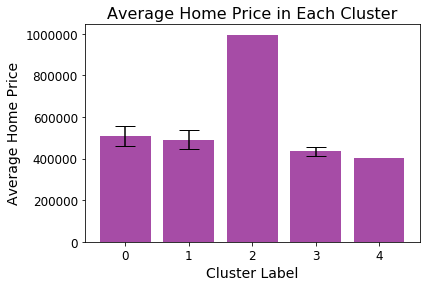

In [105]:
plt.bar(clusters_price_parks_cafes_ind_book.index, clusters_price_parks_cafes_ind_book["Average Price 2016", "mean"], 
       yerr=clusters_price_parks_cafes_ind_book["Average Price 2016", "error"], align='center',
       alpha=0.7,
       ecolor="black",
       capsize=10, color="purple")
plt.title("Average Home Price in Each Cluster", fontsize=16)
plt.ylabel("Average Home Price", fontsize=14)
plt.xlabel("Cluster Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.style.use('seaborn')
# plt.rcParams.update({'lines.markeredgewidth': 1})
plt.show()

<h4> The plot above shows that the cluster 2 has the highest average home price and hence boroughs in this cluster will not be affordable for students

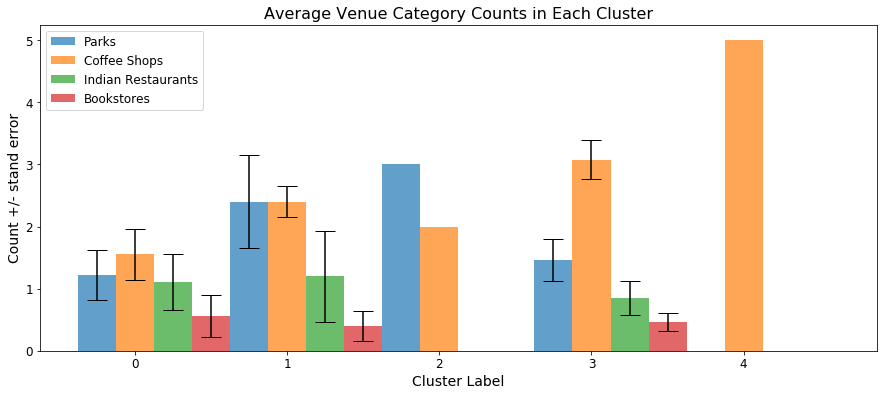

In [106]:
plt.figure(figsize=(15, 6))
width=0.25
plt.bar(clusters_price_parks_cafes_ind_book.index-width, clusters_price_parks_cafes_ind_book["Park", "mean"], width,           
       yerr=clusters_price_parks_cafes_ind_book["Park", "error"], align='center',
       alpha=0.7,
       ecolor="black",
       capsize=10, label="Parks")
plt.bar(clusters_price_parks_cafes_ind_book.index, clusters_price_parks_cafes_ind_book["Coffee Shop", "mean"], width,
       yerr=clusters_price_parks_cafes_ind_book["Coffee Shop", "error"], align='center',
       alpha=0.7,
       ecolor="black",
       capsize=10, label="Coffee Shops")
plt.bar(clusters_price_parks_cafes_ind_book.index+width, clusters_price_parks_cafes_ind_book["Indian Restaurant", "mean"], width,
       yerr=clusters_price_parks_cafes_ind_book["Indian Restaurant", "error"], align='center',
       alpha=0.7,
       ecolor="black",
       capsize=10, label="Indian Restaurants")
plt.bar(clusters_price_parks_cafes_ind_book.index+2*width, clusters_price_parks_cafes_ind_book["Bookstore", "mean"], width,
       yerr=clusters_price_parks_cafes_ind_book["Bookstore", "error"], align='center',
       alpha=0.7,
       ecolor="black",
       capsize=10, label="Bookstores")
plt.title("Average Venue Category Counts in Each Cluster", fontsize=16)
plt.ylabel("Count +/- stand error", fontsize=14)
plt.xlabel("Cluster Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="upper left")
plt.show()

<h4> Using the above plot, we can see that Clusters 0, 1 and 3 have an abundance of venues that we have deemed important for students.

<h4> Now visualizing the Crime Data for each of the Clusters

In [107]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, crime in zip(London_df['Latitude'], 
                                  London_df['Longitude'], 
                                  London_df['Borough'], 
                                  London_df['Cluster Labels'],
                                       London_df["Total_per_capita"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=np.sqrt(crime*5000),
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)

folium.map.Marker(
    [(51.5074-0.09), (-0.1278+.15)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 12pt">Circle Area = Normalized crime rate </div>',
        )
    ).add_to(map_clusters)
       
map_clusters

<h3> Creating a Dataset of the 5 safest Boroughs according to Total Crime Occurences per Capita

In [108]:
London_df.sort_values(['Total_per_capita'], ascending = True, axis = 0, inplace = True )

df_bot5 = London_df.head() 
df_bot5

,Cluster Labels,Borough,Area,Population,Latitude,Longitude,Burglary_per_capita,Criminal Damage_per_capita,Drugs_per_capita,Other Notifiable Offences_per_capita,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Average Price 2016
1,3,Bexley,23.38,236687.0,51.4549,0.1505,0.009329,0.013681,0.005594,0.002877,...,0,0,1,0,0,0,0,0,0,321563.508775
11,1,Harrow,19.49,243372.0,51.5898,-0.3346,0.015059,0.009829,0.004503,0.001948,...,0,0,0,0,0,0,0,0,0,453862.308808
24,1,Sutton,16.93,195914.0,51.3618,-0.1945,0.012822,0.013460,0.004905,0.002220,...,0,0,1,0,0,0,0,0,0,365303.130833
22,1,Richmond upon Thames,22.17,191365.0,51.4479,-0.3260,0.014684,0.011611,0.003742,0.002268,...,0,0,0,1,0,0,0,0,0,653760.818533
16,1,Kingston upon Thames,14.38,166793.0,51.4085,-0.3064,0.010828,0.012483,0.009857,0.002338,...,1,0,0,0,0,0,0,0,0,483333.446750


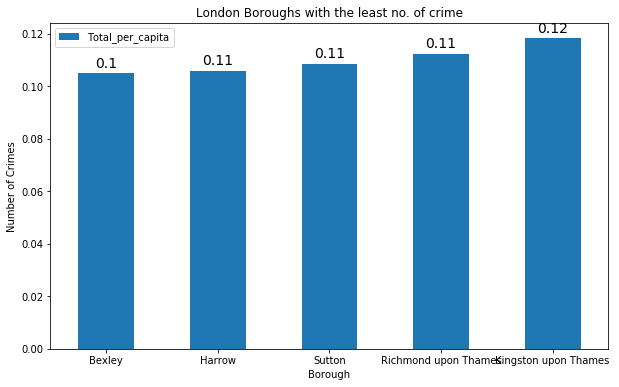

In [109]:
df_bt = df_bot5[['Borough','Total_per_capita']]

df_bt.set_index('Borough',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

We see that <b>Bexley</b> is the safest neighbourhood according to Total Crime per Capita. Bexley is in the Cluster 3 and hence is also affordable for students and has the amenities that we consider important for students arriving to study in London from India.
Other boroughs in Cluster 1 can also be considered as alternatives to Bexley depending on factors like distance to University, availabilty of housing and so on.

<h2> Thank you!